# Guide for Authors

This workbook compiles the most important conventions for all book chapters.


## Organization of this Book

### Chapters  as Notebooks

Each chapter comes in its own _Jupyter notebook_.  A single notebook (= a chapter) should cover the material (text and code, possibly slides) for a 90-minute lecture.

A chapter notebook should be named `Topic.ipynb`, where `Topic` is the topic.  `Topic` must be usable as a Python module, so `Topic` should:

* start with an upercase letter
* consist of letters and underscores (`_`) only
* should use underscores (`_`) to separate words.

All non-notebook files and folders come with lowercase letters; this may make it easier to differentiate them.

Notebooks are stored in the `notebooks` folder.

### Output Formats

The notebooks by themselves can be used by instructors and students to toy around with.  They can edit code (and text) as they like and even run them as a slide show.

The notebook can be _exported_ to multiple (non-interactive) formats:

* HTML – for placing this material online.
* PDF – for printing (and selling :-)
* Python – for coding
* Slides – for presenting

The default export options already do a good job in producing these formats; however, there also is a Makefile that generates all of these automatically.

### The Book

The book is compiled automatically from the individual notebooks.  Each notebook becomes a chapter; references are compiled in the final chapter.

## Creating and Building

### Tools you will need

To work on the notebook files, you need the following:

1. Jupyter notebook.  The easiest way to install this is via the [Anaconda distribution](https://www.anaconda.com/download/)

2. Once you have the Jupyter notebook installed, you can start editing and coding right away by starting `jupyter notebook` in the topmost folder.  You can download PDF versions from the environment.

3. On the Mac, the `Pineapple` app integrates a nice editor with a local server.  This is easy to use, but misses a few features.

4. To create the entire book (with citations, references, and all), you also need the [ipybublish](https://github.com/chrisjsewell/ipypublish) package.  This allows you to merge multiple chapters into a single PDF or HTML file, create slides, and more.  A Makefile provides the essential tools for creation.


### Version Control

We use git in a single strand of revisions.  Do not branch, do not merge. Sync early; sync often.  Only push if everything ("make all") builds and passes.


The [nbdime](https://github.com/jupyter/nbdime) package gives you tools such as `nbdiff` (and even better, `nbdiff-web`) to compare notebooks against each other; this ensures that cell _contents_ are compared rather than the binary format.


`nbdime config-git --enable` integrates nbdime with git such that `git diff` runs the above tools; merging should also be notebook-specific.

### Creating Derived Formats (HTML, PDF, code, ...)

The `Makefile` provides rules for all targets.  Type `make help` for instructions.

The Makefile should work with GNU make and a standard Jupyter Notebook installation.  To create the multi-chapter book and BibTeX citation support, you need to install the  [iPyPublish](https://github.com/chrisjsewell/ipypublish) package (which includes the `nbpublish` command).

### Creating a New Chapter

To create a new chapter for the book,

1. Set up a new `.ipynb` notebook file.  You can create one from scratch, or
   by copying an existing one and deleting cells. (This latter option makes it easier to preserve metadata.)

2. Include it in the `CHAPTERS` list in the `Makefile`

3. Add it to the git repository.

## Coding

### Set up

The first code block in each notebook should be

In [1]:
import gstbook

This sets up stuff such that notebooks can import each other's code (see below). This import statement is removed in the exported Python code, as the .py files would import each other directly.

### Coding Style and Consistency

We use Python 3 (specifically, Python 3.5) for all code.  If you can, try to write code that can be easily backported to Python 2.

We use standard Python coding conventions according to [PEP 8](https://www.python.org/dev/peps/pep-0008/).  

Your code must pass the `pycodestyle` style checks which you get by invoking `make style`.  The `code prettify` notebook extension allows you to automatically make your code adhere to PEP 8.

Beyond simple syntactical things, here's a [very nice guide](https://docs.python-guide.org/writing/style/) to get you started writing "pythonic" code.


### Design and Architecture

Stick to simple functions and data types.  We want our readers to focus on functionality, not Python.  You are encouraged to write in a "pythonic" style, making use of elegant Python features such as list comprehensions, sets, and more; however, if you do so, be sure to explain the code such that readers familiar with, say, C or Java can still understand things.

Do not use object orientation - in notebooks, you can only define classes as a whole, which clashes with the notebook style of incrementally developing a program.

### Using Notebooks as Modules

Each notebook becomes a _module_ in Python which can be imported by others.

Unfortunately, code that has side effects (say, `print` statements) will also be executed during import.  If that is a problem, guard statements to be run in the notebook only with

```python
if __name__ == '__main__':
    code_to_be_executed_in_notebook_only()
```

Since this clutters up notebooks quite a bit, use it ony when needed.

### Importing Code from Other Modules

To import the code of individual notebooks, you can import directly from .ipynb notebook files.  Since notebooks may perform calculations and print results (see above), use the `%%capture` magic at the beginning of a cell to suppress output.

In [6]:
%%capture
from Basic_Fuzzing import fuzzer

In [7]:
fuzzer(100, ord('0'), 10)

'90337667134788079943802799571210536741217107132040797894394591889846996'

The exported Python code will import from the respective .py file instead.

Please have all imports at the beginning of the workbook, such that dependencies are clear.

### Quality Assurance

In your code, make use of plenty of assertions that allow to catch errors quickly.  You can also add _hidden assertions_ that would not be included in the final PDF, but still run (and break the build if they fail).

### Issue Tracker

The GitLab project page allows to enter and track issues.

## Writing Text

Text blocks use Markdown syntax.  [Here is a handy guide](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).


### Sections

Any chapter notebook must begin with `# TITLE`, and sections and subsections should then follow by `## SECTION` and `### SUBSECTION`.

Sections should start with their own block, to facilitate cross-referencing.


### Highlighting

Use

* _emphasis_ for highlighting,
* `backticks` for code and other verbatim elements.


### Hyphens and Dashes

Use – for em-dashes, - for hyphens, and $-$ for minus.

### Lists and enumerations

You can use bulleted lists:

* Item A
* Item B

and enumerations:

1. item 1
1. item 2

For description lists, use a combination of bulleted lists and highlights:

* **PDF** is great for reading offline
* **HTML** is great for reading online



### Math

LaTeX math formatting works, too.

`$x = \sum_{n = 1}^{\infty}\frac{1}{n}$` gets you
$x = \sum_{n = 1}^{\infty}\frac{1}{n}$.


### Inline Code

Python code normally goes into its own cells, but you can also have it in the text:

```python
s = "Python syntax highlighting"
print s
```

## Images

To insert images, use Markdown syntax `![Andreas Zeller](PICS/Zeller.jpg){width=100%}` inserts a picture from the `PICS` folder.

![Andreas Zeller](PICS/Zeller.jpg){width=100%}

All pictures go to `PICS/`, both in source as well as derived formats; both are stored in git, too.  (Not all of us have all tools to recreate diagrams, etc.)

## Floating Elements and References

\todo[inline]{I haven't gotten this to work yet -- AZ}

To produce floating elements in LaTeX and PDF, edit the metadata of the cell which contains it. (In the Jupyter Notebook Toolbar go to View -> Cell Toolbar -> Edit Metadata and a button will appear above each cell.) This allows you to control placement and create labels.

### Floating Figures

Edit metadata as follows:

```json
{
"ipub": {
  "figure": {
    "caption": "Figure caption.",
    "label": "fig:flabel",
    "placement": "H",
	"height":0.4,
    "widefigure": false,
    }
  }
}
```

- all tags are optional
- height/width correspond to the fraction of the page height/width, only one should be used (aspect ratio will be maintained automatically)
- `placement` is optional and constitutes using a placement arguments for the figure (e.g. \begin{figure}[H]). See [Positioning_images_and_tables](https://www.sharelatex.com/learn/Positioning_images_and_tables).
- `widefigure` is optional and constitutes expanding the figure to the page width (i.e. \begin{figure*}) (placement arguments will then be ignored)


### Floating Tables

For  **tables** (e.g. those output by `pandas`), enter in cell metadata:

```json
{
"ipub": {
     "table": {
	    "caption": "Table caption.",
	    "label": "tbl:tlabel",
	    "placement": "H",
            "alternate": "gray!20"
	  }
   }
}
```

- `caption` and `label` are optional
- `placement` is optional and constitutes using a placement arguments for the table (e.g. \begin{table}[H]). See [Positioning_images_and_tables](https://www.sharelatex.com/learn/Positioning_images_and_tables).
- `alternate` is optional and constitutes using alternating colors for the table rows (e.g. \rowcolors{2}{gray!25}{white}). See (https://tex.stackexchange.com/a/5365/107738)[https://tex.stackexchange.com/a/5365/107738].
- if tables exceed the text width, in latex, they will be shrunk to fit 


### Floating Equations

For  **equations** (e.g. those output by `sympy`), enter in cell metadata:

```json
{
  "ipub": {
	  "equation": {
        "environment": "equation",
	    "label": "eqn:elabel"
	  }
  }
}
```

- environment is optional and can be 'none' or any of those available in [amsmath](https://www.sharelatex.com/learn/Aligning_equations_with_amsmath); 'equation', 'align','multline','gather', or their \* variants. Additionaly, 'breqn' or 'breqn\*' will select the experimental [breqn](https://ctan.org/pkg/breqn) environment to *smart* wrap long equations. 
- label is optional and will only be used if the equation is in an environment


### References

To reference to a floating object, use `\cref`, e.g. \cref{eq:texdemo}



## Cross-Referencing

###  Section References

* To refer to sections in the same notebook, use the header name as anchor, e.g. 
`[Code](#Code)` gives you [Code](#Code).  For multi-word titles, replace spaces by hyphens (`-`), as in [Using Notebooks as Modules](#Using-Notebooks-as-Modules).

* To refer to cells (e.g. equations or figures), you can define a label as cell metadata.  See [Floating Elements and References](#Floating-Elements-and-References) for details.

* To refer to other notebooks, use a Markdown cross-reference to the notebook file, e.g. [the "Fuzzing" chapter](Basic_Fuzzing.ipynb).  A special script will be run to take care of these links.  Reference chapters by name, not by number.

### Citations

To cite papers, cite in LaTeX style: `\cite{purdom1972}`, which gets you \cite{purdom1972}.  The keys refer to BibTeX entries in [gstbook.bib](gstbook.bib).  

* LaTeX/PDF output will have a "References" section appended.
* HTML output will link to the URL field from the BibTeX entry. Be sure it points to the DOI.

## Todo's

* To mark todo's, use `\todo{Thing to be done}.`  \todo{Expand this}

## Tables

Tables with fixed contents can be produced using Markdown syntax:

| Tables | Are | Cool |
| ------ | ---:| ----:|
| Zebra  | 2   |   30 |
| Gnu    | 20  |  400 |


If you want to produce tables from Python data, the `PrettyTable` package (included in the book) allows to [produce tables with LaTeX-style formatting.](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook)

In [4]:
import numpy as np
import gstbook.PrettyTable as pt

data = np.array([[1, 2, 30], [2, 3, 400]])
pt.PrettyTable(data, [r"$\frac{a}{b}$", r"$b$", r"$c$"], print_latex_longtable=False)

$\frac{a}{b}$,$b$,$c$
1,2,30
2,3,400


## Plots and Data

It is possible to include plots in notebooks.  Here is an example of plotting a function:

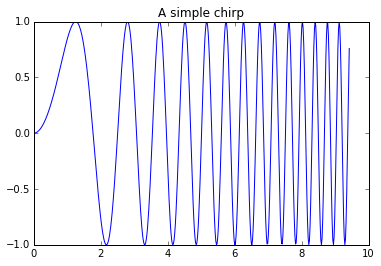

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, 3 * np.pi, 500)
plt.plot(x, np.sin(x ** 2))
plt.title('A simple chirp');

And here's an example of plotting data:

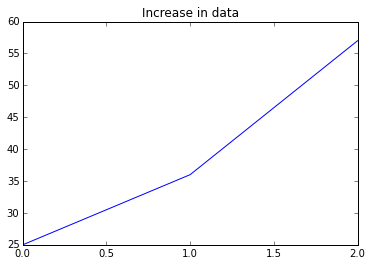

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
data = [25, 36, 57]
plt.plot(data)
plt.title('Increase in data');

Plots are available in all derived versions (HTML, PDF, etc.)

## Slides

You can set up the notebooks such that they also can be presented as slides.  In the browser, select View -> Cell Toolbar -> Slideshow.  You can then select a slide type for each cell:

* `New slide` starts a new slide with the cell
* `Sub-slide` starts a new slide (which you navigate "down" to)
* `Fragment` is a cell that gets revealed after a click
* `Skip` is skipped during the slide show
* `Notes` goes into presenter notes

To create slides, do `make slides`; to view them, change into the `slides/` folder and open the created HTML files.  (The `reveal.js` package has to be in the same folder as the slide to be presented.)

I am not sure how many people will use the notebooks as slide shows, but it comes as a nice extra.



(Hint: In a slide presentation, type `s` to see presenter notes.)

## Writing Tools

When you're editing in the browser, you may find these extensions helpful:  [Jupyter Notebook Extensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) is a collection of productivity-enhancing tools (including spellcheckers).

I found these extensions to be particularly useful:

  * Code prettify (to produce "nice" syntax)
  
  * Codefolding
  
  * Live Markdown Preview (while you're editing)
  
  * Spell Checker (while you're editing)
  
  * Table of contents (for quick navigation)

## Interaction

It is possible to include interactive elements in a notebook, as in the following example:

```python
try:
    from ipywidgets import interact, interactive, fixed, interact_manual

    x = interact(fuzzer, char_start=(32, 128), char_range=(0, 96))
except ImportError:
    pass
```

Note that such elements will be present in the notebook versions only, but not in the HTML and PDF versions, so use them sparingly (if at all).  To avoid errors during production of derived files, protect against `ImportError` exceptions as in the above example.

## Read More

Here is some documentation on the tools we use:

1. [Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) - general introduction to Markdown

1. [iPyPublish](https://github.com/chrisjsewell/ipypublish) - rich set of tools to create documents with citations and references




## Alternative Tool Sets

We don't currently use these, but they are worth learning:

1. [Making Publication-Ready Python Notebooks](http://blog.juliusschulz.de/blog/ultimate-ipython-notebook) - Another tool set on how to produce book chapters from notebooks

1. [Writing academic papers in plain text with Markdown and Jupyter notebook](https://sylvaindeville.net/2015/07/17/writing-academic-papers-in-plain-text-with-markdown-and-jupyter-notebook/) - Alternate ways on how to generate citations

1. [A Jupyter LaTeX template](https://gist.github.com/goerz/d5019bedacf5956bcf03ca8683dc5217#file-revtex-tplx) - How to define a LaTeX template

1. [Boost Your Jupyter Notebook Productivity](https://towardsdatascience.com/jupyter-notebook-hints-1f26b08429ad) - a collection of hints for debugging and profiling Jupyter notebooks

